In [145]:
import tifffile
import trackpy as tp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [150]:
# Load the TIFF movie
movie = tifffile.imread('Region3-1.tif')

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [148]:
def get_PSF_frame(movie_frame, x, y, frame_size, keep_edges=False):
    half_frame = int(frame_size/2)
    int_x = round(x); int_y = round(y)
    lower_x = int_x - half_frame
    lower_y = int_y - half_frame
    upper_x = int_x + half_frame + 1
    upper_y = int_y + half_frame + 1
    upper_limit_x = movie_frame.shape[1]
    upper_limit_y = movie_frame.shape[0]
    if keep_edges:
        if lower_x < 0:
            lower_x = 0
        if lower_y < 0:
            lower_y = 0
        if upper_x > upper_limit_x:
            upper_x = upper_limit_x
        if upper_y > upper_limit_y:
            upper_y = upper_limit_y
    else:
        if lower_x < 0 or lower_y < 0 or upper_x > upper_limit_x or upper_y > upper_limit_y:
            return False
    return np.array(movie_frame)[lower_y:upper_y, lower_x:upper_x]

def get_PSF_frames(movie, frame_size=13, to_plot=False, movie_frames=True):
    if type(movie_frames) == bool:
        movie_frames = range(len(movie))
    # Initialize an empty list to store the full movie frames
    full_frames = []
    PSF_frames = []

    # Loop through each frame in the movie
    for i in movie_frames:
        # Perform localization on the frame
        full_frame = tp.locate(movie[i], diameter=7, 
                        minmass=200, max_iterations=100,
                        separation=2)  # Adjust the minmass parameter as needed

        # Add the frame to the list
        full_frames.append(frame)

        # Plot the frame with the identified features
        if to_plot:
            fig, ax = plt.subplots(1)
            ax.imshow(movie[i], cmap='gray')

        # Draw a box around each identified feature
        for index, row in full_frame.iterrows():
            if to_plot:
                rect = patches.Rectangle((row['x']-int(frame_size/2), row['y']-int(frame_size/2)), frame_size, frame_size, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
            PSF_frame = get_PSF_frame(movie[i], row['x'], row['y'], frame_size)
            if type(PSF_frame) == bool:
                continue
            PSF_frames.append(PSF_frame)
        if to_plot:
            plt.title(f'Full Frame {i}')
            plt.show()

    # Convert the list of frames to a numpy array
    frames = np.array(full_frames)
    PSF_frames = np.array(PSF_frames)
    return PSF_frames

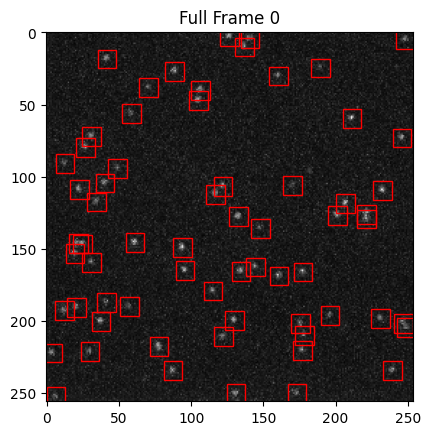

In [156]:
PSF_frames = get_PSF_frames(movie, frame_size=13, to_plot=True, movie_frames=[0])

In [157]:
PSF_frames = get_PSF_frames(movie, frame_size=13, to_plot=False)

(5850, 13, 13)


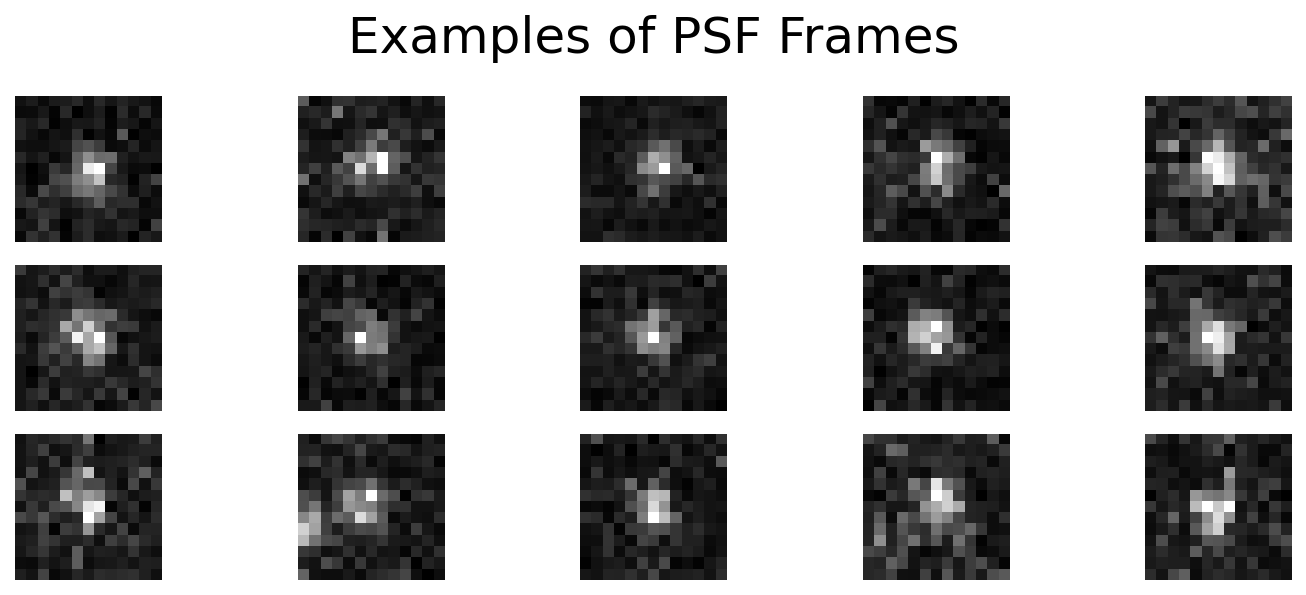

In [155]:
print(PSF_frames.shape)
num_PSFs = 15
indices = np.random.choice(PSF_frames.shape[0], size=num_PSFs, replace=False)
image_list = PSF_frames[indices]

# Creating a 2x5 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(10, 4), dpi=150)

# Flattening the 2D array of axes to a 1D array
axes = axes.flatten()

# Iterating over each image and corresponding axis
for i in range(len(axes)):
    # Displaying the image on the corresponding axis
    axes[i].imshow(image_list[i], cmap='gray')
    axes[i].axis('off')

plt.suptitle("Examples of PSF Frames", fontsize=24)
plt.tight_layout()
plt.show()